<a href="https://colab.research.google.com/github/fvergara24/superbowl57/blob/main/NFL22_23ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [372]:
df=pd.read_csv('/content/drive/MyDrive/SuperBowl/NFL22-23 - nfl.csv')

# ETL DataFrames

In [373]:
def k_todo():
  kansas_visitante = df[df['Visitante']=='Kansas City Chiefs']
  kansas_local =df[df['Local']=='Kansas City Chiefs']
  kansas_local=kansas_local[['Local','Resultado2','Resultado1','Visitante','Semana']]
  kansas_local = kansas_local.rename(columns={'Resultado2':'Resultado1', 'Resultado1':'Resultado2'})
  kansas_local = kansas_local.rename(columns={'Local':'Visitante', 'Visitante':'Local'})
  kansas=pd.concat([kansas_visitante, kansas_local])
  kansas = kansas.reset_index(drop=True)
  kansas = kansas.rename(columns={'Visitante':'Equipo1', 'Local':'Equipo2'})
  k_ganador=[]
  for i in range(len(kansas)):
    if kansas.iloc[i][1]>kansas.iloc[i][2]:
      k_ganador.append(1)
    else:
      k_ganador.append(0) 
  kansas['Ganados']=k_ganador
  kansas = kansas.sort_values(by='Semana')
  kansas=kansas.reset_index(drop=True)
  return kansas

In [374]:
def e_todo():
  e_visitante = df[df['Visitante']=='Philadelphia Eagles']
  e_local =df[df['Local']=='Philadelphia Eagles']
  e_local = e_local[['Local','Resultado2','Resultado1','Visitante','Semana']]
  e_local = e_local.rename(columns={'Resultado2':'Resultado1', 'Resultado1':'Resultado2'})
  e_local = e_local.rename(columns={'Local':'Visitante', 'Visitante':'Local'})
  eagles=pd.concat([e_visitante, e_local])
  eagles = eagles.reset_index(drop=True)
  eagles = eagles.rename(columns={'Visitante':'Equipo1', 'Local':'Equipo2'})
  e_ganador=[]
  for i in range(len(eagles)):
    if eagles.iloc[i][1]>eagles.iloc[i][2]:
      e_ganador.append(1)
    else:
      e_ganador.append(0) 
  eagles['Ganados']=e_ganador
  eagles = eagles.sort_values(by='Semana')
  eagles=eagles.reset_index(drop=True)
  return eagles

# Juegos

In [375]:
print('Juegos Ganados')
print('eagles',eagles['Ganados'].sum(),',','kansas',kansas['Ganados'].sum())
print('Juegos Perdidos')
print('eagles',eagles['Ganados'].value_counts()[0],',','kansas',kansas['Ganados'].value_counts()[0])

Juegos Ganados
eagles 16 , kansas 16
Juegos Perdidos
eagles 3 , kansas 3


#Puntos

## Puntos máximos y mínimos

In [437]:
print('Kansas')
print(kansas['Resultado1'].agg([max,min]))
print('Eagles')
print(eagles['Resultado1'].agg([max,min]))

Kansas
max    44
min    17
Name: Resultado1, dtype: int64
Eagles
max    48
min    10
Name: Resultado1, dtype: int64


In [436]:
kansas = k_original()
eagles = e_original()
print('TOTALES')
print('SOLO EN TEMPORADA')
kansas = kansas.sort_values(by='Semana').reset_index(drop=True).drop([17,18])
eagles = eagles.sort_values(by='Semana').reset_index(drop=True).drop([17,18])
print('A favor')
print('Kansas', round(kansas['Resultado1'].sum()), 'Eagles', round(eagles['Resultado1'].sum()))
print('En contra')
print('Kansas',round(kansas['Resultado2'].sum()),'Eagles',round(eagles['Resultado2'].sum()))
print('-------')
print('PROMEDIO por partido')
print('A favor')
print('Kansas', round(kansas['Resultado1'].mean()), 'Eagles', round(eagles['Resultado1'].mean()))
print('En contra')
print('Kansas',round(kansas['Resultado2'].mean()),'Eagles',round(eagles['Resultado2'].mean()))
kansas = k_original()
eagles = e_original()
print('-------')
print('CON POSTEMPORADA')
print('A favor')
print('Kansas', round(kansas['Resultado1'].sum()), 'Eagles', round(eagles['Resultado1'].sum()))
print('En contra')
print('Kansas',round(kansas['Resultado2'].sum()),'Eagles',round(eagles['Resultado2'].sum()))
print('-------')
print('PROMEDIO por partido')
print('A favor')
print('Kansas', round(kansas['Resultado1'].mean()), 'Eagles', round(eagles['Resultado1'].mean()))
print('En contra')
print('Kansas',round(kansas['Resultado2'].mean()),'Eagles',round(eagles['Resultado2'].mean()))

TOTALES
SOLO EN TEMPORADA
A favor
Kansas 496 Eagles 477
En contra
Kansas 369 Eagles 344
-------
PROMEDIO por partido
A favor
Kansas 29 Eagles 28
En contra
Kansas 22 Eagles 20
-------
CON POSTEMPORADA
A favor
Kansas 546 Eagles 546
En contra
Kansas 409 Eagles 358
-------
PROMEDIO por partido
A favor
Kansas 29 Eagles 29
En contra
Kansas 22 Eagles 19


Están igual en ofensiva //
Tiene mejor defensiva Eagles 

##Diferencia de puntos cuando son ganadores

In [438]:
kansas['Diferencia']=kansas['Resultado1']-kansas['Resultado2']
eagles['Diferencia']=eagles['Resultado1']-eagles['Resultado2']
print('Promedio de la diferencia de puntos por partido en GENERAL')
print('kansas', round(kansas['Diferencia'].mean()), 'eagles', round(eagles['Diferencia'].mean()))

Promedio de la diferencia de puntos por partido en GENERAL
kansas 7 eagles 10


In [439]:
kansas['Diferencia']=kansas['Resultado1']-kansas['Resultado2']
eagles['Diferencia']=eagles['Resultado1']-eagles['Resultado2']
k_dif=[]
for i in range(len(kansas)):
  if kansas.iloc[i][6]>0:
    k_dif.append(kansas.iloc[i][6])
k_dif=np.array(k_dif)
e_dif=[]
for i in range(len(eagles)):
  if eagles.iloc[i][6]>0:
    e_dif.append(eagles.iloc[i][6])
e_dif=np.array(e_dif)
print('Promedio de la diferencia de puntos por partido cuando son GANADORES')
print('kansas', round(k_dif.mean()), 'eagles', round((e_dif.mean())))

Promedio de la diferencia de puntos por partido cuando son GANADORES
kansas 9 eagles 13


In [440]:
k_dif_perdedor=[]
for i in range(len(kansas)):
  if kansas.iloc[i][6]<0:
    k_dif_perdedor.append(kansas.iloc[i][6])
k_dif_perdedor=np.array(k_dif_perdedor)
e_dif_perdedor=[]
for i in range(len(eagles)):
  if eagles.iloc[i][6]<0:
    e_dif_perdedor.append(eagles.iloc[i][6])
e_dif_perdedor=np.array(e_dif_perdedor)
print('Promedio de la diferencia de puntos por partido cuando son PERDEDORES')
print('kansas', round(k_dif_perdedor.mean()), 'eagles', round((e_dif_perdedor.mean())))

Promedio de la diferencia de puntos por partido cuando son PERDEDORES
kansas -3 eagles -9


#Graficas

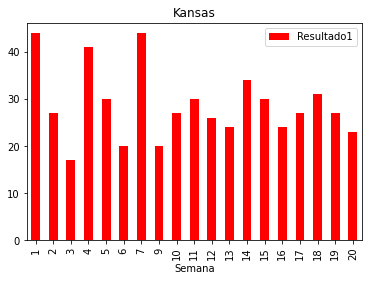

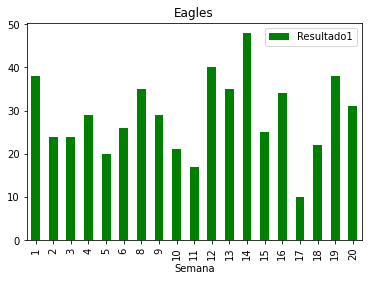

In [384]:
kansas.sort_values(by='Semana').plot(x='Semana',y='Resultado1',kind='bar',title='Kansas', color='red')
eagles.sort_values(by='Semana').plot(x='Semana',y='Resultado1',kind='bar',title='Eagles', color='green')
plt.show()

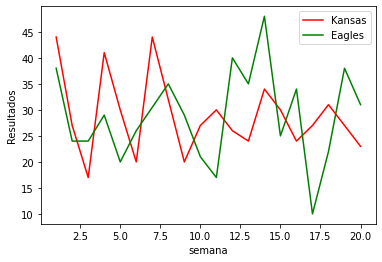

In [385]:
kansas=kansas.sort_values(by='Semana')
eagles=eagles.sort_values(by='Semana')
fig, ax = plt.subplots()
ax.plot(kansas["Semana"], kansas["Resultado1"], label='Kansas', color='red')
ax.plot(eagles["Semana"], eagles["Resultado1"], label='Eagles', color='green') 
ax.set_xlabel("semana")
ax.set_ylabel("Resultados")
ax.legend()
plt.show()

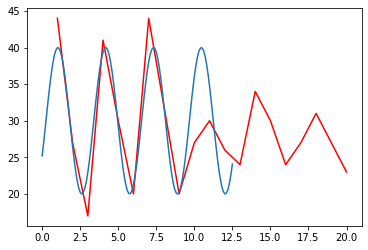

In [386]:
fig, ax = plt.subplots()
ax.plot(kansas["Semana"], kansas["Resultado1"], label='Kansas', color='red')
plt.plot(np.arange(0,4*np.pi,0.1),10*(np.sin(2*x-0.5))+30)
plt.show()

In [387]:
kansas=kansas.reset_index(drop=True)
kansas_10=kansas.loc[8:]

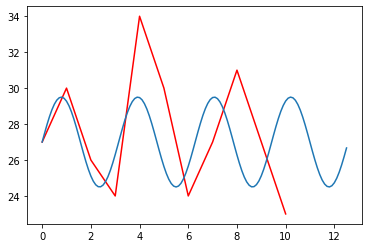

In [388]:
fig, ax = plt.subplots()
ax.plot(kansas_10["Semana"]-10, kansas_10["Resultado1"], label='Kansas', color='red')
plt.plot(np.arange(0,4*np.pi,0.1),2.5*(np.sin(2*x))+27)
plt.show()

##Puntos en contra

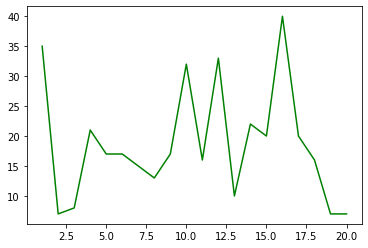

In [389]:
eagles = eagles.sort_values(by='Semana')
fig, ax = plt.subplots()
ax.plot(eagles["Semana"], eagles["Resultado2"], label='Eagles', color='green') 
plt.show()

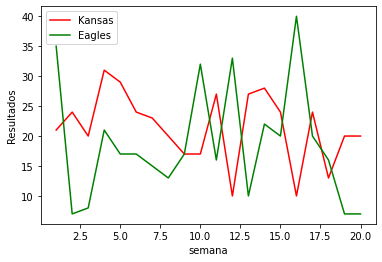

In [390]:
kansas = kansas.sort_values(by='Semana')
eagles = eagles.sort_values(by='Semana')
fig, ax = plt.subplots()
ax.plot(kansas["Semana"], kansas["Resultado2"], label='Kansas', color='red')
ax.plot(eagles["Semana"], eagles["Resultado2"], label='Eagles', color='green') 
ax.set_xlabel("semana")
ax.set_ylabel("Resultados")
ax.legend()
plt.show()

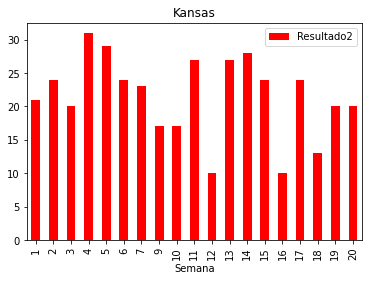

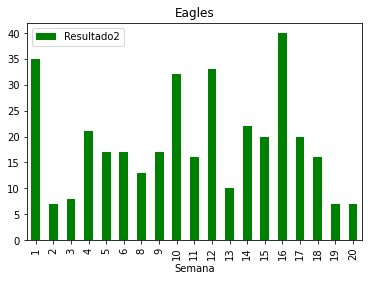

In [391]:
kansas.sort_values(by='Semana').plot(x='Semana',y='Resultado2',kind='bar',title='Kansas', color='red')
eagles.sort_values(by='Semana').plot(x='Semana',y='Resultado2',kind='bar',title='Eagles', color='green')
plt.show()

In [392]:
kansas.loc[17:]

,Equipo1,Resultado1,Resultado2,Equipo2,Semana,Ganados
17,Kansas City Chiefs,27,20,Jacksonville Jaguars,19,1
18,Kansas City Chiefs,23,20,Cincinnati Bengals,20,1


In [393]:
eagles=eagles.reset_index(drop=True)
eagles.loc[17:]

,Equipo1,Resultado1,Resultado2,Equipo2,Semana,Ganados
17,Philadelphia Eagles,38,7,New York Giants,19,1
18,Philadelphia Eagles,31,7,San Francisco 49ers,20,1


#Equipos entre ambos

In [382]:
k_perdedor=[]
for i in range(len(kansas)):
  if kansas.iloc[i][5]==0:
    k_perdedor.append(kansas.iloc[i][3])
print('Kansas perdió contra', k_perdedor)
e_perdedor=[]
for i in range(len(eagles)):
  if eagles.iloc[i][5]==0:
    e_perdedor.append(eagles.iloc[i][3])
print('Eagles perdió contra',e_perdedor)

Kansas perdió contra ['Indianapolis Colts', 'Buffalo Bills', 'Cincinnati Bengals']
Eagles perdió contra ['Washington Commanders', 'Dallas Cowboys', 'New Orleans Saints']


In [467]:
eq_iguales=[]
 for i in range(len(eagles)):
   for j in range(len(equipo)): 
    if eagles.iloc[i][3]==equipo[j]:
      eq_iguales.append(equipo[j])
eq_iguales

['Jacksonville Jaguars',
 'Jacksonville Jaguars',
 'Arizona Cardinals',
 'Houston Texans',
 'Indianapolis Colts',
 'Tennessee Titans',
 'San Francisco 49ers']

In [520]:
eq_iguales_df = pd.DataFrame(columns=kansas.columns)
for i in range(1,len(eq_iguales)):
  eq_iguales_df = pd.concat([eq_iguales_df,kansas[kansas['Equipo2']==eq_iguales[i]]])
  eq_iguales_df = pd.concat([eq_iguales_df,eagles[eagles['Equipo2']==eq_iguales[i]]])
eq_iguales_df = eq_iguales_df.reset_index(drop=True)
eq_iguales_df

,Equipo1,Resultado1,Resultado2,Equipo2,Semana,Ganados,Diferencia
0,Kansas City Chiefs,27,17,Jacksonville Jaguars,10,1,10
1,Kansas City Chiefs,27,20,Jacksonville Jaguars,19,1,7
2,Philadelphia Eagles,29,21,Jacksonville Jaguars,4,1,8
3,Kansas City Chiefs,44,21,Arizona Cardinals,1,1,23
4,Philadelphia Eagles,20,17,Arizona Cardinals,5,1,3
5,Kansas City Chiefs,30,24,Houston Texans,15,1,6
6,Philadelphia Eagles,29,17,Houston Texans,9,1,12
7,Kansas City Chiefs,17,20,Indianapolis Colts,3,0,-3
8,Philadelphia Eagles,17,16,Indianapolis Colts,11,1,1
9,Kansas City Chiefs,20,17,Tennessee Titans,9,1,3


In [516]:
nuevo['Diferencia'].mean()

10.3125

# Marcador Final

Eagles 25 - Kansas 22